In [1]:
%matplotlib inline

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_log_file(log_file, stop_epoch=None):
    d_loss, g_loss, g_w_diff = [], [], []
    sparsity_mean, sparsity_std, sparsity_epochs = [], [], []
    entropy_mean, entropy_std, entropy_epochs = [], [], []

    epoch = 0
    with open(log_file, 'r') as f:
        for line in f:
            if re.match(r"(\d+)\s(\[D.*?\])\s(\[G.*?\])", line): # pattern = "0 [D ] [G ]"
                epoch, d_info, g_info = re.findall(r"(\d+)\s(\[D.*?\])\s(\[G.*?\])", line)[0]
                epoch = int(epoch)
                d_info = re.split(', |: ',d_info[3:-1])
                d_info = dict(zip(*[iter(d_info)] * 2))
                d_loss.append([float(d_info['loss']), float(d_info['w_loss_real']), 
                               float(d_info['w_loss_fake']), float(d_info['gp_loss'])
                              ])

                g_info = re.split(', |: ',g_info[3:-1])
                g_info = dict(zip(*[iter(g_info)] * 2))
                g_loss.append([float(g_info['loss'])])

            elif line.startswith('sparsity: DescribeResult'):
                stats = line.split(': ')[1]
                m = re.findall(r"mean=.*?,", stats)[0][5:-1]
                v = re.findall(r"variance=.*?,", stats)[0][9:-1]
                sparsity_mean.append(float(m))
                sparsity_std.append(np.sqrt(float(v)))
                sparsity_epochs.append(epoch)
            elif line.startswith('entropy: DescribeResult'):
                stats = line.split(': ')[1]
                m = re.findall(r"mean=.*?,", stats)[0][5:-1]
                v = re.findall(r"variance=.*?,", stats)[0][9:-1]
                entropy_mean.append(float(m))
                entropy_std.append(np.sqrt(float(v)))
                entropy_epochs.append(epoch)
            ## compatible with old runs
            elif line.startswith('sparsity'):
                spr = line.split(': ')[1]
                sparsity_mean.append(float(spr))
                sparsity_std.append(0.)
                sparsity_epochs.append(epoch)
            elif line.startswith('DescribeResult'):
                m = re.findall(r"mean=.*?,", line)[0][5:-1]
                v = re.findall(r"variance=.*?,", line)[0][9:-1]
                entropy_mean.append(float(m))
                entropy_std.append(float(v))
                entropy_epochs.append(epoch)

            if stop_epoch is not None and epoch == stop_epoch:
                break
    
    return ((d_loss, g_loss, g_w_diff), 
            (sparsity_mean, sparsity_std, sparsity_epochs), 
            (entropy_mean, entropy_std, entropy_epochs))


def plot_loss(d_loss, g_loss, g_w_diff, xlim=None, ylim=None):
    ## plot g_loss and d_loss
    d_loss, g_loss = np.array(d_loss), np.array(g_loss)
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(d_loss[:,1] - d_loss[:,2], 'r', label='critic')
    ax.plot(g_loss[:,0], 'b', label='generator')
    ax.legend(loc='upper right', shadow=True, fontsize='x-small')
    ax.set_xlabel("iteration")
    if xlim is not None:
        ax.set_xlim(*xlim)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_title("critic and generator loss")
    plt.show()


def plot_stats(mean, std, epochs, name, xlim=None, ylim=None):
    ## plot sparsity
    gmean, gstd = mean[0], std[0]
    print([gmean, gstd])
    mean, std, epochs = mean[1:], std[1:], epochs[1:]
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(epochs, mean, 'r')
    ax.errorbar(epochs, mean, std)
    ax.axhline(y=gmean, xmin=0, xmax=np.max(epochs), linestyle='dashed', color='r')
    ax.axhline(y=gmean + gstd, xmin=0, xmax=np.max(epochs), linestyle='dashed', color=(1.0,0,0,0.5))
    ax.axhline(y=gmean - gstd, xmin=0, xmax=np.max(epochs), linestyle='dashed', color=(1.0,0,0,0.5))
    ax.set_xlabel("iteration")
    if xlim is not None:
        ax.set_xlim(*xlim)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_title(name)
    plt.show()


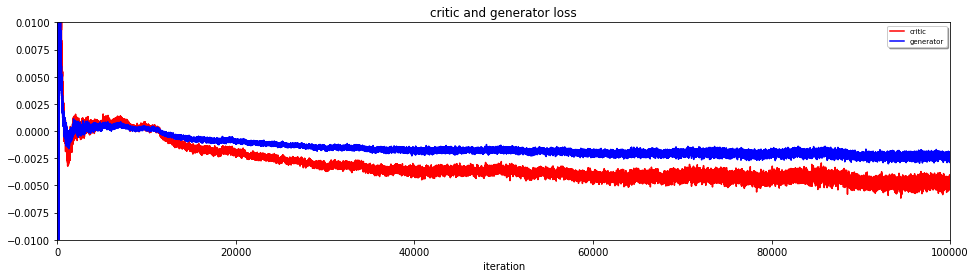

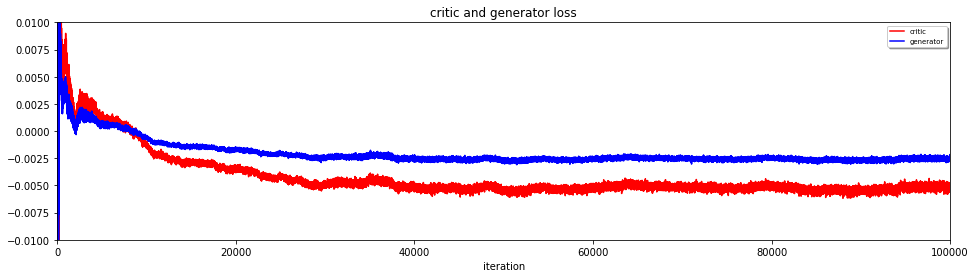

In [2]:
## case: generator: 3x512, critic: 3x256, lr=5e-5, 100k iteration
res = load_log_file("./train_logs/z.wgan_gp_official_on_micro_add_case_rerun.out")
plot_loss(*res[0], xlim=(0, 100000), ylim=(-0.01, 0.01))
# plot_stats(*res[1], name="sparsity", xlim=(0, 100000), ylim=(0.5, 1.0))
# plot_stats(*res[2], name="entropy", xlim=(0, 100000), ylim=(2.0, 4.5))

## ctrl: generator: 3x512, critic: 3x256, lr=5e-5, 100k iteration
res = load_log_file("./train_logs/z.wgan_gp_official_on_micro_add_ctrl_rerun.out")
plot_loss(*res[0], xlim=(0, 100000), ylim=(-0.01, 0.01))
# plot_stats(*res[1], name="sparsity", xlim=(0, 100000), ylim=(0.5, 1.0))
# plot_stats(*res[2], name="entropy", xlim=(0, 100000), ylim=(2.0, 4.5))

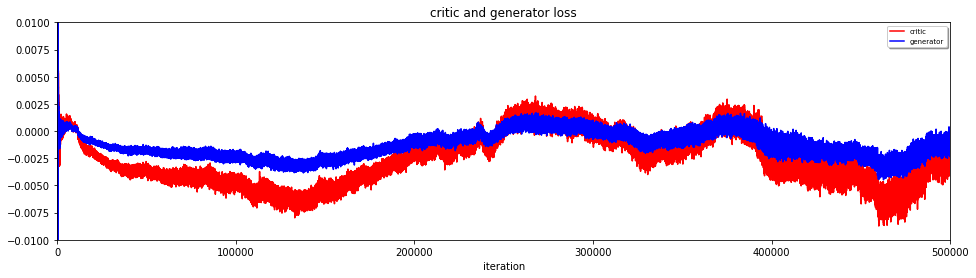

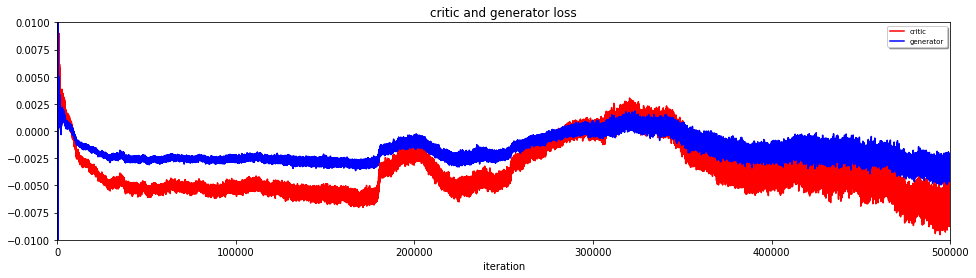

In [3]:
## case: generator: 3x512, critic: 3x256, lr=5e-5, 500k iteration
res = load_log_file("./train_logs/z.wgan_gp_official_on_micro_add_case_rerun.out")
plot_loss(*res[0], xlim=(0, 500000), ylim=(-0.01, 0.01))
# plot_stats(*res[1], name="sparsity", xlim=(0, 500000), ylim=(0.5, 1.0))
# plot_stats(*res[2], name="entropy", xlim=(0, 500000), ylim=(2.0, 4.5))

## ctrl: generator: 3x512, critic: 3x256, lr=5e-5, 500k iteration
res = load_log_file("./train_logs/z.wgan_gp_official_on_micro_add_ctrl_rerun.out")
plot_loss(*res[0], xlim=(0, 500000), ylim=(-0.01, 0.01))
# plot_stats(*res[1], name="sparsity", xlim=(0, 500000), ylim=(0.5, 1.0))
# plot_stats(*res[2], name="entropy", xlim=(0, 500000), ylim=(2.0, 4.5))